In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
# glob : 경로와 이름을 지정하여 파일을 다루는 파일 처리 작업을 위한 모듈
import glob
# re : 메타 문자를 이용하여 특정 규칙을 작성하는 정규식을 사용하기 위한 모듈
import re
# reduce : 2차원 리스트를 1차원 리스트로 차원을 줄이기 위한 모듈
from functools import reduce
# word_tokenize : 자연어 처리 패키지(from nltk.tokenize) 중에서
# 단어 토큰화 작업을 위한 모듈
from nltk.tokenize import word_tokenize
# stopwords : 자연어 처리 패키지(from nltk.corplus) 중에서 불용어 정보를 제공하는 모듈
from nltk.corpus import stopwords
# WordNetLemmatizer : 자연어 처리 패키지(from nltk.stem) 중에서 단어 형태의 일반화를
# 위해 표제어 추출을 제공하는 모듈
from nltk.stem import WordNetLemmatizer
# Counter : 데이터 집합에서 개수를 자동으로 계산하기 위한 모듈
from collections import Counter
# matplotlib.pyplot : 히스토그램을 그리기 위한 matplotlib 패키지의 내부 모듈
# (matplotlib.pyplot as plt 의미는 plt 단어로 축약해서 별칭 사용합니다)
import matplotlib.pyplot as plt

In [2]:
school_df = pd.read_csv('C:\Python_Project\data/경기도_고등학교현황.csv', encoding = 'euc-kr', engine='python')

In [ ]:
school_df.to_csv('C:\Python_Project\data/경기도_고등학교현황2.csv', index=False)

In [3]:
school_df.head()

설립구분명     시설명          전화번호                  소재지지번주소              소재지도로명주소  \
0    사립  가온고등학교  031-674-5022      경기도 안성시 발화동 215-7번지        경기도 안성시 샛터길 46   
1    공립  가운고등학교  031-567-2913       경기도 남양주시 다산동 684번지    경기도 남양주시 가운로2길 115   
2    공립  가좌고등학교  031-910-1900  경기도 고양시 일산서구 가좌동 1097번지  경기도 고양시 일산서구 가좌1로 43   
3    공립  가평고등학교  031-580-7021   경기도 가평군 가평읍 대곡리 66-2번지  경기도 가평군 가평읍 호반로 2601   
4    공립  갈매고등학교  031-524-6000        경기도 구리시 갈매동 653번지      경기도 구리시 갈매순환로 75   

   소재지우편번호    WGS84위도     WGS84경도        고등학교구분명  
0  17596.0  36.988880  127.277141  비평준화 일반고/특성화고  
1  12266.0  37.599443  127.160655        평준화 일반고  
2  10210.0  37.688000  126.720154       비평준화 일반고  
3  12421.0  37.818621  127.513691       비평준화 일반고  
4  11902.0  37.627397  127.117656       비평준화 일반고

In [ ]:
school_df = school_df.drop(['WGS84위도'], axis =1)

In [ ]:
school_df = school_df.drop(['WGS84경도'], axis =1)

In [ ]:
school_df

In [ ]:
def assign_rank(school_classification):
    if '과학' in school_classification:
        return 1
    elif '외' in school_classification:
        return 2
    elif '국제' in school_classification:
        return 1
    elif '특성화' in school_classification:
        return 4
    elif '예' in school_classification:
        return 5
    elif '비' in school_classification:
        return 3
    elif '자율' in school_classification:
        return 2
    elif '마이스터' in school_classification:
        return 1
    else:
        return 5

In [ ]:
school_df['rank'] = school_df['고등학교구분명'].apply(assign_rank)

In [ ]:
school_df.to_csv('C:\Python_Project\data/경기도_고등학교현황_0913.csv', encoding = 'euc-kr',index = False)

In [ ]:
school_df = pd.read_csv('C:\Python_Project\data/학교정보0913.csv', encoding = 'euc-kr', engine = 'python')

In [ ]:
school_df

In [ ]:
school_df.columns[0]

In [ ]:
school_df.rename(columns={'최소요구등급' : '진학가능내신등급'}, inplace= True)
school_df

In [ ]:
school_df.drop([485], axis=0, inplace= True)

In [ ]:
school_df

In [ ]:
school_df = school_df.drop(school_df.columns[0], axis=1)

In [ ]:
school_df

In [ ]:
school_df.to_csv('C:\Python_Project\data/경기도_고등학교현황_전처리적용_mjh.csv', encoding = 'euc-kr',index = False)

In [ ]:
school_df = pd.read_csv('C:\Python_Project\data/경기도_고등학교현황_전처리적용_mjh.csv', encoding = 'euc-kr')

In [117]:
school_df

설립구분명     시설명          전화번호                  소재지지번주소  \
0      사립  가온고등학교  031-674-5022      경기도 안성시 발화동 215-7번지   
1      공립  가운고등학교  031-567-2913       경기도 남양주시 다산동 684번지   
2      공립  가좌고등학교  031-910-1900  경기도 고양시 일산서구 가좌동 1097번지   
3      공립  가평고등학교  031-580-7021   경기도 가평군 가평읍 대곡리 66-2번지   
4      공립  갈매고등학교  031-524-6000        경기도 구리시 갈매동 653번지   
..    ...     ...           ...                      ...   
480    공립  효양고등학교  031-645-7015  경기도 이천시 부발읍 신하리 264-1번지   
481    공립  효원고등학교  031-228-1516   경기도 수원시 영통구 매탄동 1154번지   
482    공립  효자고등학교  031-853-0057     경기도 의정부시 신곡동 768-1번지   
483    공립  흥덕고등학교  031-218-0200   경기도 용인시 기흥구 영덕동 1020번지   
484    공립  흥진고등학교  031-390-4109      경기도 군포시 금정동 875-7번지   

                 소재지도로명주소  소재지우편번호        고등학교구분명  진학가능내신등급  
0          경기도 안성시 샛터길 46  17596.0  비평준화 일반고/특성화고         3  
1      경기도 남양주시 가운로2길 115  12266.0        평준화 일반고         5  
2    경기도 고양시 일산서구 가좌1로 43  10210.0       비평준화 일반고         5  
3    경기도 가평군 가평읍 호반로 2601  12421.0       비평준화 일반고         5  
4        경기도 구리시 갈매순환로 75  11902.0       비평준화 일반고         5  
..                    ...      ...            ...       ...  
480   경기도 이천시 부발읍 효양로 214  17327.0        평준화 일반고         5  
481  경기도 수원시 영통구 동수원로 336  16546.0        평준화 일반고         5  
482      경기도 의정부시 부용로 165  11771.0        평준화 일반고         5  
483   경기도 용인시 기흥구 흥덕2로 36  16952.0        평준화 일반고         5  
484     경기도 군포시 오금로 15-17  15864.0        평준화 일반고         5  

[485 rows x 8 columns]

In [185]:
school_df[school_df['소재지지번주소'].str.contains('성남시')] ## df[조건식]

설립구분명          시설명           전화번호                   소재지지번주소  \
32     사립     계원예술고등학교   031-710-8500     경기도 성남시 분당구 정자동 207번지   
81     사립       낙생고등학교   031-780-6314     경기도 성남시 분당구 판교동 649번지   
86     공립      늘푸른고등학교   031-726-4041     경기도 성남시 분당구 정자동 6-3번지   
106    공립       돌마고등학교   031-780-7500     경기도 성남시 분당구 이매동 265번지   
107    사립       동광고등학교   031-754-4811  경기도 성남시 중원구 성남동 2876-1번지   
161    공립       보평고등학교  031-8017-0462     경기도 성남시 분당구 백현동 544번지   
162    공립       복정고등학교   031-720-1707   경기도 성남시 수정구 복정동 144-1번지   
175    공립     분당경영고등학교  031-8023-1305     경기도 성남시 분당구 금곡동 123번지   
176    공립       분당고등학교   031-710-7700      경기도 성남시 분당구 수내동 25번지   
177    사립     분당대진고등학교   031-706-8574      경기도 성남시 분당구 분당동 72번지   
178    공립     분당아람고등학교   031-706-0291     경기도 성남시 분당구 야탑동 216번지   
179    사립   분당영덕여자고등학교   031-724-6000     경기도 성남시 분당구 야탑동 455번지   
180    공립     분당중앙고등학교  031-8020-8201     경기도 성남시 분당구 정자동 220번지   
181    공립       불곡고등학교   031-710-2810      경기도 성남시 분당구 구미동 91번지   
203    공립       서현고등학교   031-701-5993    경기도 성남시 분당구 서현동 91-1번지   
206    공립       성남고등학교   031-7290-300    경기도 성남시 중원구 성남동 2870번지   
207    공립     성남여자고등학교   031-750-4483    경기도 성남시 중원구 성남동 2877번지   
208    공립    성남외국어고등학교   031-789-2300   경기도 성남시 분당구 백현동 376-1번지   
209    공립  성남테크노과학고등학교   031-753-0253    경기도 성남시 중원구 하대원동 153번지   
211    사립     성보경영고등학교   031-742-7714       경기도 성남시 수정구 단대동 5번지   
215    사립       성일고등학교   031-750-1800    경기도 성남시 중원구 성남동 2876번지   
216    사립     성일정보고등학교   031-720-1300    경기도 성남시 중원구 성남동 2876번지   
231    사립       송림고등학교   031-704-6705     경기도 성남시 분당구 이매동 378번지   
238    공립       수내고등학교   031-715-8276     경기도 성남시 분당구 수내동 120번지   
254    사립     숭신여자고등학교   031-732-8101    경기도 성남시 중원구 금광동 2686번지   
289    사립       야탑고등학교  (031)697-0100   경기도 성남시 분당구 야탑동 145-3번지   
295    공립    양영디지털고등학교   031-778-2400     경기도 성남시 분당구 서현동 316번지   
332    공립       운중고등학교  031-8017-0593     경기도 성남시 분당구 운중동 957번지   
338    공립     위례한빛고등학교  031-8038-1954     경기도 성남시 수정구 창곡동 574번지   
350    공립       이매고등학교   031-704-4042     경기도 성남시 분당구 이매동 147번지   
353    사립       이우고등학교   031-710-6903   경기도 성남시 분당구 동원동 157-1번지   
417    사립       태원고등학교   031-704-6601   경기도 성남시 분당구 야탑동 754-1번지   
426    공립       판교고등학교  031-8017-0841     경기도 성남시 분당구 삼평동 706번지   
441    사립       풍생고등학교   031-7508-402  경기도 성남시 수정구 수진동 4511-1번지   
461    공립       한솔고등학교   031-714-4381     경기도 성남시 분당구 정자동 115번지   
479    사립       효성고등학교   031-723-6240     경기도 성남시 수정구 심곡동 321번지   

                      소재지도로명주소  소재지우편번호        고등학교구분명  진학가능내신등급  
32         경기도 성남시 분당구 불정로 100  13606.0             예고         5  
81       경기도 성남시 분당구 대왕판교로 477  13480.0        평준화 일반고         5  
86    경기도 성남시 분당구 성남대로407번길 26  13554.0        평준화 일반고         5  
106        경기도 성남시 분당구 이매로 105  13571.0        평준화 일반고         5  
107         경기도 성남시 중원구 원터로 84  13370.0        평준화 일반고         5  
161       경기도 성남시 분당구 동판교로 124  13527.0        평준화 일반고         5  
162       경기도 성남시 수정구 복정안골로 35  13114.0        평준화 일반고         5  
175        경기도 성남시 분당구 금곡로 289  13617.0           특성화고         3  
176    경기도 성남시 분당구 내정로165번길 31  13597.0        평준화 일반고         5  
177        경기도 성남시 분당구 분당로 271  13583.0        평준화 일반고         5  
178        경기도 성남시 분당구 장미로 153  13500.0           특성화고         3  
179    경기도 성남시 분당구 판교로592번길 13  13515.0        평준화 일반고         5  
180        경기도 성남시 분당구 불정로 174  13604.0        평준화 일반고         5  
181        경기도 성남시 분당구 금곡로 149  13629.0        평준화 일반고         5  
203         경기도 성남시 분당구 분당로 87  13588.0        평준화 일반고         5  
206         경기도 성남시 중원구 시민로 61  13359.0        평준화 일반고         5  
207      경기도 성남시 중원구 원터로94번길 6  13370.0        평준화 일반고         5  
208  경기도 성남시 분당구 대왕판교로385번길 28  13543.0           외국어고         2  
209    경기도 성남시 중원구 둔촌대로258번길 7  13406.0           특성화고         3  
211         경기도 성남시 수정구 논골로 82  13132.0           특성화고         3  
215     경기도 성남시 중원구 시민로77번길 10  13370.0        평준화 일반고         5  
216   경기도 성남시 중원구 시민로77번길 10-2  13370.0           

In [184]:
words_to_count = ['성남시']
count = school_df['소재지지번주소'].apply(lambda x: sum(word in x for word in words_to_count)).sum()

print(f"'{', '.join(words_to_count)}'의 고등학교는 총 {count}개 입니다.")

'성남시'의 고등학교는 총 36개 입니다.


In [ ]:
unique_cities = school_df['소재지지번주소'].dropna().drop_duplicates()

print("소재지지번주소:")
print(unique_cities)

In [ ]:
addr = pd.DataFrame(school_df['소재지지번주소'].apply(lambda v : v.split()[:2]).tolist(), columns=('도', '시군구'))

In [ ]:
addr

In [ ]:
addr['시군구'].unique()

In [ ]:
addr['도'].unique()

In [ ]:
addr['count'] = 0
addr.head()

In [ ]:
addr_cnt = pd.DataFrame(addr.groupby(['도','시군구'], as_index = False).count())

In [ ]:
addr_cnt

In [ ]:
from matplotlib import pyplot as plt

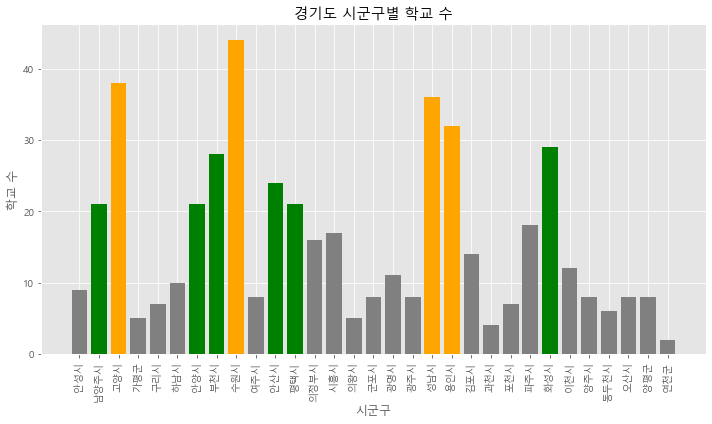

In [188]:
# 데이터 준비
cities = ['안성시', '남양주시', '고양시', '가평군', '구리시', '하남시', '안양시', '부천시', '수원시',
          '여주시', '안산시', '평택시', '의정부시', '시흥시', '의왕시', '군포시', '광명시', '광주시',
          '성남시', '용인시', '김포시', '과천시', '포천시', '파주시', '화성시', '이천시', '양주시',
          '동두천시', '오산시', '양평군', '연천군']
counts = [9, 21, 38, 5, 7, 10, 21, 28, 44, 8, 24, 21, 16, 17, 5, 8, 11, 8, 36, 32, 14, 4, 7, 18, 29, 12, 8, 6, 8, 8, 2]

colors = ['green' if 30 > cities >= 20 else 'orange' if cities >= 30 else 'gray' for cities in counts]

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(cities, counts, color = colors)

# 그래프 제목 및 라벨 설정
plt.title('경기도 시군구별 학교 수')
plt.xlabel('시군구')
plt.ylabel('학교 수')

# x축 라벨 회전
plt.xticks(rotation=90)

# 그래프 출력
plt.tight_layout()
plt.savefig('school_local_count.png', dpi=300, bbox_inches='tight')
plt.show()


In [98]:
unique_cities = school_df['소재지지번주소'].dropna().drop_duplicates()

print("소재지지번주소:")
print(unique_cities)

소재지지번주소:
0          경기도 안성시 발화동 215-7번지
1           경기도 남양주시 다산동 684번지
2      경기도 고양시 일산서구 가좌동 1097번지
3       경기도 가평군 가평읍 대곡리 66-2번지
4            경기도 구리시 갈매동 653번지
                ...           
480    경기도 이천시 부발읍 신하리 264-1번지
481     경기도 수원시 영통구 매탄동 1154번지
482       경기도 의정부시 신곡동 768-1번지
483     경기도 용인시 기흥구 영덕동 1020번지
484        경기도 군포시 금정동 875-7번지
Name: 소재지지번주소, Length: 473, dtype: object


In [99]:
school_df[school_df['고등학교구분명'].str.contains('과학고')] 

설립구분명        시설명          전화번호                  소재지지번주소  \
8     공립   경기과학고등학교  031-259-0400  경기도 수원시 장안구 송죽동 68-23번지   
14    공립  경기북과학고등학교  031-870-2706       경기도 의정부시 녹양동 305번지   

                소재지도로명주소  소재지우편번호 고등학교구분명  진학가능내신등급  
8    경기도 수원시 장안구 수일로 135  16297.0     과학고         1  
14  경기도 의정부시 체육로135번길 32  11601.0     과학고         1

In [100]:
school_df[school_df['고등학교구분명'].str.contains('외국어고')]

설립구분명         시설명          전화번호                    소재지지번주소  \
18     사립   경기외국어고등학교  031-3610-500        경기도 의왕시 고천동 438-1번지   
39     사립   고양외국어고등학교  031-969-9072      경기도 고양시 덕양구 관산동 332번지   
47     사립   과천외국어고등학교   02-504-3300           경기도 과천시 중앙동 11번지   
77     사립   김포외국어고등학교  031-996-7700   경기도 김포시 월곶면 갈산리 465-33번지   
111    공립  동두천외국어고등학교  031-864-9906       경기도 동두천시 지행동 310-1번지   
208    공립   성남외국어고등학교  031-789-2300    경기도 성남시 분당구 백현동 376-1번지   
245    공립   수원외국어고등학교  031-258-9341  경기도 수원시 영통구 이의동 1088-23번지   
287    사립      안중고등학교  031-683-3104      경기도 평택시 안중읍 현화리 315번지   

                      소재지도로명주소  소재지우편번호 고등학교구분명  진학가능내신등급  
18         경기도 의왕시 고산로105번길 30  16075.0    외국어고         2  
39         경기도 고양시 덕양구 통일로 820  10286.0    외국어고         2  
47              경기도 과천시 희망길 36  13805.0    외국어고         2  
77       경기도 김포시 월곶면 김포대로 2537  10023.0    외국어고         2  
111           경기도 동두천시 지행로 145  11361.0    외국어고         2  
208  경기도 성남시 분당구 대왕판교로385번길 28  13543.0    외국어고         2  
245       경기도 수원시 영통구 창룡대로 263  16227.0    외국어고         2  
287       경기도 평택시 안중읍 안중믿음길 32  17932.0    외국어고         2

In [116]:
school_df[school_df['고등학교구분명'].str.contains('마이스터고')]

설립구분명           시설명          전화번호                   소재지지번주소  \
6      공립  경기게임마이스터고등학교  031-428-5402    경기도 안양시 동안구 비산동 1101번지   
248    공립     수원하이텍고등학교  031-201-9000  경기도 수원시 영통구 영통동 1049-1번지   
437    공립        풍덕고등학교  031-218-0500   경기도 용인시 수지구 풍덕천동 1121번지   

                  소재지도로명주소  소재지우편번호 고등학교구분명  진학가능내신등급  
6       경기도 안양시 동안구 학의로 70  14043.0   마이스터고         1  
248    경기도 수원시 영통구 청명북로 56  16710.0   마이스터고         1  
437  경기도 용인시 수지구 정평로13번길 5  16843.0   마이스터고         1

In [121]:
school_df[school_df['고등학교구분명'].str.contains('특성화고')]

설립구분명         시설명          전화번호                   소재지지번주소  \
0      사립      가온고등학교  031-674-5022       경기도 안성시 발화동 215-7번지   
7      사립    경기경영고등학교  032-652-1701  경기도 부천시 소사구 심곡본동 768-9번지   
9      사립    경기관광고등학교  031-882-9196     경기도 여주시 대신면 율촌리 271번지   
10     공립  경기국제통상고등학교  032-320-6218   경기도 부천시 원미구 중동 1171-1번지   
11     공립    경기대명고등학교  031-300-3600     경기도 수원시 권선구 당수동 122번지   
..    ...         ...           ...                       ...   
460    사립    한빛누리고등학교  031-863-8337      경기도 동두천시 생연동 522-1번지   
462    공립      함현고등학교  031-430-8226      경기도 시흥시 정왕동 1878-9번지   
463    공립      행신고등학교  031-974-6292     경기도 고양시 덕양구 행신동 790번지   
476    공립      화정고등학교  031-930-0627     경기도 고양시 덕양구 화정동 938번지   
477    공립      화홍고등학교  031-220-3308    경기도 수원시 권선구 권선동 1302번지   

                      소재지도로명주소  소재지우편번호        고등학교구분명  진학가능내신등급  
0               경기도 안성시 샛터길 46  17596.0  비평준화 일반고/특성화고         3  
7          경기도 부천시 소사구 심곡로 100  14747.0           특성화고         3  
9         경기도 여주시 대신면 여양로 1416  12610.0           특성화고         3  
10         경기도 부천시 원미구 석천로 141  14583.0           특성화고         3  
11   경기도 수원시 권선구 수인로598번길 3-24  16364.0           특성화고         3  
..                         ...      ...            ...       ...  
460           경기도 동두천시 동광로 124  11313.0           특성화고         3  
462            경기도 시흥시 역전로 463  15017.0  비평준화 일반고/특성화고         3  
463         경기도 고양시 덕양구 소만로 36  10532.0           특성화고         3  
476         경기도 고양시 덕양구 화정로 17  10496.0  비평준화 일반고/특성화고         3  
477        경기도 수원시 권선구 세권로 331  16551.0           특성화고         3  

[103 rows x 8 columns]

In [129]:
words_to_count = ['특성화고']
count = school_df['고등학교구분명'].apply(lambda x: sum(word in x for word in words_to_count)).sum()

print(f"'{', '.join(words_to_count)}'의 고등학교는 총 {count}개 입니다.")


'특성화고'의 고등학교는 총 103개 입니다.


In [122]:
school_df[school_df['고등학교구분명'].str.contains('예고')]

설립구분명        시설명          전화번호                    소재지지번주소  \
17     공립   경기예술고등학교  032-328-0844      경기도 부천시 원미구 중동 1031번지   
21     공립   경기체육고등학교  031-547-8500     경기도 수원시 장안구 천천동 30-1번지   
32     사립   계원예술고등학교  031-710-8500      경기도 성남시 분당구 정자동 207번지   
38     사립   고양예술고등학교  031-929-0700  경기도 고양시 일산서구 덕이동 753-11번지   
286    사립  안양외국어고등학교  031-470-4000    경기도 안양시 만안구 안양동 산41-1번지   

                       소재지도로명주소  소재지우편번호 고등학교구분명  진학가능내신등급  
17      경기도 부천시 원미구 석천로209번길 37  14537.0      예고         5  
21          경기도 수원시 장안구 상률로 106  16322.0      예고         5  
32          경기도 성남시 분당구 불정로 100  13606.0      예고         5  
38   경기도 고양시 일산서구 덕이로172번길 4-39  10228.0      예고         5  
286      경기도 안양시 만안구 양화로37번길 36  14011.0      예고         5

In [123]:
school_df[school_df['고등학교구분명'].str.contains('자율고')]

설립구분명          시설명          전화번호                소재지지번주소  \
278    사립  안산디자인문화고등학교  031-400-3100  경기도 안산시 상록구 본오동 798번지   
327    사립       우성고등학교  031-3619-200      경기도 의왕시 고천동 496번지   
335    공립       원미고등학교  032-722-6200  경기도 부천시 원미구 중동 1098번지   

               소재지도로명주소  소재지우편번호 고등학교구분명  진학가능내신등급  
278  경기도 안산시 상록구 각골로 87  15535.0     자율고         2  
327      경기도 의왕시 오전로 37  16062.0     자율고         2  
335  경기도 부천시 원미구 옥산로 48  14575.0     자율고         2

In [137]:
school_df[school_df['고등학교구분명'].str.contains('비')]

설립구분명     시설명          전화번호                  소재지지번주소  \
0      사립  가온고등학교  031-674-5022      경기도 안성시 발화동 215-7번지   
2      공립  가좌고등학교  031-910-1900  경기도 고양시 일산서구 가좌동 1097번지   
3      공립  가평고등학교  031-580-7021   경기도 가평군 가평읍 대곡리 66-2번지   
4      공립  갈매고등학교  031-524-6000        경기도 구리시 갈매동 653번지   
5      공립  감일고등학교   02-480-7390        경기도 하남시 감이동 450번지   
..    ...     ...           ...                      ...   
471    공립  호평고등학교  031-590-1723       경기도 남양주시 호평동 677번지   
473    사립  화성고등학교  031-352-7813    경기도 화성시 향남읍 장짐리 161번지   
476    공립  화정고등학교  031-930-0627    경기도 고양시 덕양구 화정동 938번지   
478    사립  효명고등학교  031-664-1022        경기도 평택시 장당동 470번지   
479    사립  효성고등학교  031-723-6240    경기도 성남시 수정구 심곡동 321번지   

                 소재지도로명주소  소재지우편번호        고등학교구분명  진학가능내신등급  
0          경기도 안성시 샛터길 46  17596.0  비평준화 일반고/특성화고         3  
2    경기도 고양시 일산서구 가좌1로 43  10210.0       비평준화 일반고         5  
3    경기도 가평군 가평읍 호반로 2601  12421.0       비평준화 일반고         5  
4        경기도 구리시 갈매순환로 75  11902.0       비평준화 일반고         5  
5       경기도 하남시 감일순환로 165  12997.0       비평준화 일반고         5  
..                    ...      ...            ...       ...  
471      경기도 남양주시 호평로 109  12146.0       비평준화 일반고         5  
473     경기도 화성시 향남읍 장짐길 4  18587.0       비평준화 일반고         5  
476    경기도 고양시 덕양구 화정로 17  10496.0  비평준화 일반고/특성화고         3  
478        경기도 평택시 송탄로 51  17784.0       비평준화 일반고         5  
479    경기도 성남시 수정구 심곡로 16  13103.0       비평준화 일반고         5  

[188 rows x 8 columns]

In [138]:
school_df[school_df['고등학교구분명'].str.contains('일반')]

설립구분명     시설명          전화번호                  소재지지번주소  \
0      사립  가온고등학교  031-674-5022      경기도 안성시 발화동 215-7번지   
1      공립  가운고등학교  031-567-2913       경기도 남양주시 다산동 684번지   
2      공립  가좌고등학교  031-910-1900  경기도 고양시 일산서구 가좌동 1097번지   
3      공립  가평고등학교  031-580-7021   경기도 가평군 가평읍 대곡리 66-2번지   
4      공립  갈매고등학교  031-524-6000        경기도 구리시 갈매동 653번지   
..    ...     ...           ...                      ...   
480    공립  효양고등학교  031-645-7015  경기도 이천시 부발읍 신하리 264-1번지   
481    공립  효원고등학교  031-228-1516   경기도 수원시 영통구 매탄동 1154번지   
482    공립  효자고등학교  031-853-0057     경기도 의정부시 신곡동 768-1번지   
483    공립  흥덕고등학교  031-218-0200   경기도 용인시 기흥구 영덕동 1020번지   
484    공립  흥진고등학교  031-390-4109      경기도 군포시 금정동 875-7번지   

                 소재지도로명주소  소재지우편번호        고등학교구분명  진학가능내신등급  
0          경기도 안성시 샛터길 46  17596.0  비평준화 일반고/특성화고         3  
1      경기도 남양주시 가운로2길 115  12266.0        평준화 일반고         5  
2    경기도 고양시 일산서구 가좌1로 43  10210.0       비평준화 일반고         5  
3    경기도 가평군 가평읍 호반로 2601  12421.0       비평준화 일반고         5  
4        경기도 구리시 갈매순환로 75  11902.0       비평준화 일반고         5  
..                    ...      ...            ...       ...  
480   경기도 이천시 부발읍 효양로 214  17327.0        평준화 일반고         5  
481  경기도 수원시 영통구 동수원로 336  16546.0        평준화 일반고         5  
482      경기도 의정부시 부용로 165  11771.0        평준화 일반고         5  
483   경기도 용인시 기흥구 흥덕2로 36  16952.0        평준화 일반고         5  
484     경기도 군포시 오금로 15-17  15864.0        평준화 일반고         5  

[387 rows x 8 columns]

In [153]:
school_df[school_df['고등학교구분명'].str.contains('국제고')]

설립구분명       시설명           전화번호                  소재지지번주소  \
36     공립  고양국제고등학교   031-839-5000  경기도 고양시 일산동구 식사동 1483번지   
119    공립  동탄국제고등학교  031-8015-9000        경기도 화성시 반송동 203번지   
410    공립    초당고등학교   031-547-9100    경기도 용인시 기흥구 중동 1040번지   

                   소재지도로명주소  소재지우편번호 고등학교구분명  진학가능내신등급  
36   경기도 고양시 일산동구 위시티4로 112  10321.0     국제고         1  
119        경기도 화성시 동탄나루로 27  18441.0     국제고         1  
410    경기도 용인시 기흥구 동백중앙로 21  17013.0     국제고         1

In [110]:
schoolScience = pd.DataFrame(school_df['고등학교구분명'].apply(lambda v : v.split()[:1]).tolist(), columns=('과학고'))

TypeError: Index(...) must be called with a collection of some kind, '과학고' was passed

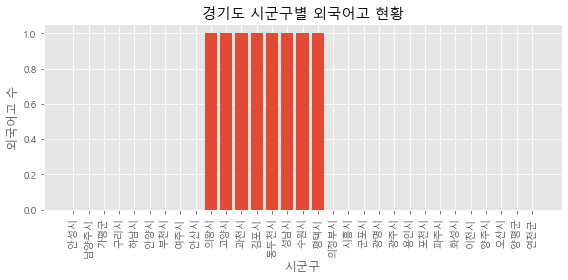

In [134]:
# 데이터 준비
cities = [ '안성시', '남양주시', '가평군', '구리시', '하남시', '안양시', '부천시','여주시', '안산시', '의왕시', '고양시', '과천시', '김포시', '동두천시', '성남시', '수원시', '평택시',
          '의정부시', '시흥시', '군포시', '광명시', '광주시','용인시', '포천시', '파주시', '화성시', '이천시', '양주시','오산시', '양평군', '연천군']
foreign = [ 0, 0, 0, 0, 0, 0, 0, 0, 0,1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# colors = ['green' if 30 > cities >= 20 else 'orange' if cities >= 30 else 'gray' for cities in counts]

# 그래프 생성
plt.figure(figsize=(8, 4))
plt.bar(cities, foreign)

# 그래프 제목 및 라벨 설정
plt.title('경기도 시군구별 외국어고 현황')
plt.xlabel('시군구')
plt.ylabel('외국어고 수')

# x축 라벨 회전
plt.xticks(rotation=90)

# 그래프 출력
plt.tight_layout()
plt.show()

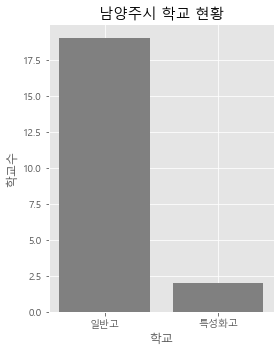

In [135]:
cities = ['일반고', '특성화고']
counts = [19, 2]

colors = ['green' if 30 > cities >= 20 else 'orange' if cities >= 30 else 'gray' for cities in counts]

# 그래프 생성
plt.figure(figsize=(4, 5))
plt.bar(cities, counts, color = colors)

# 그래프 제목 및 라벨 설정
plt.title('남양주시 학교 현황')
plt.xlabel('학교')
plt.ylabel('학교수')

# x축 라벨 회전
# plt.xticks(rotation=90)

# 그래프 출력
plt.tight_layout()
plt.show()

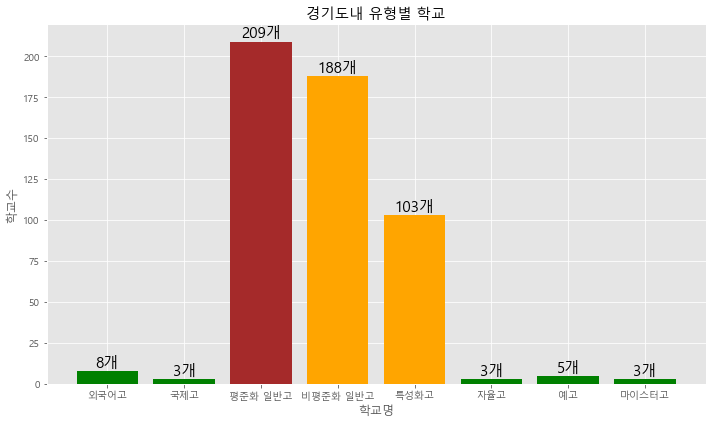

In [189]:
schools = ['외국어고', '국제고','평준화 일반고', '비평준화 일반고', '특성화고','자율고', '예고', '마이스터고' ]
counts = [8, 3, 209, 188, 103, 3, 5, 3]

colors = ['brown' if 200 < cities  else 'orange' if cities >= 30 else 'green' for cities in counts]

# 그래프 생성
plt.figure(figsize=(10, 6))
bar = plt.bar(schools, counts, color = colors)

# 그래프에 숫자표시
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d개' % height, ha='center', va='bottom', size = 15)

# x축 라벨 회전
# plt.xticks(rotation=90)
   
# 그래프 제목 및 라벨 설정
plt.title('경기도내 유형별 학교')
plt.xlabel('학교명')
plt.ylabel('학교수')

# 그래프 출력
plt.tight_layout()
# 이미지 저장
plt.savefig('school_type.png', dpi=300, bbox_inches='tight')
plt.show()

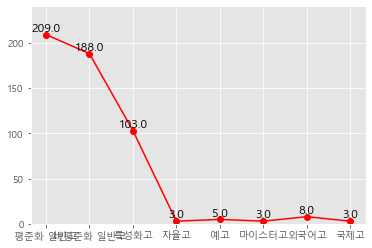

In [183]:
import matplotlib.pyplot as plt

schools = ['평준화 일반고', '비평준화 일반고', '특성화고','자율고', '예고', '마이스터고', '외국어고', '국제고' ]
counts = [209, 188, 103, 3, 5, 3,  8, 3]

line_graph = plt.plot(schools, counts, 'o-', color = 'red')
plt.ylim(0, 240)

# 숫자 넣는 부분, height + 0.5로 숫자 약간 위로 위치하게 조정
for i in range(len(schools)):
    height = counts[i]
    plt.text(schools[i], height + 0.5, '%.1f' %height, ha='center', va='bottom', size = 12)

plt.show()